In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#
# load data and inspect
#
df = pd.read_csv('austin_weather.csv')
#
print(df.head())
print(df.tail())

         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevelPressureLowInches Visibili

In [3]:
df = df.loc[:, ['Date', 'TempAvgF']]

In [4]:
#
# add some useful columns
#
df.loc[:, 'Year'] = df.loc[:, 'Date'].str.slice(0, 4).astype('int')
df.loc[:, 'Month'] = df.loc[:, 'Date'].str.slice(5, 7).astype('int')
df.loc[:, 'Day'] = df.loc[:, 'Date'].str.slice(8, 10).astype('int')
#

In [5]:
#
# set a 20 day window then use that to smooth 
# temperature in a new column
window = 20
df['20_d_mov_avg'] = df.TempAvgF.rolling(window).mean()

In [6]:
#
# now let's slice exactly one year on the
# calendar start and end dates
# we see from the previous output that 
# 2014 is the first year with complete data, 
# however it will still have NaN values for 
# the moving average, so we'll use 2015
#
df_one_year = df.loc[df.Year == 2015, :].reset_index()
df_one_year['Day_of_Year'] = df_one_year.index + 1
print(df_one_year.head())
print(df_one_year.tail())

   index        Date  TempAvgF  Year  Month  Day  20_d_mov_avg  Day_of_Year
0    376  2015-01-01        37  2015      1    1         52.70            1
1    377  2015-01-02        41  2015      1    2         51.50            2
2    378  2015-01-03        51  2015      1    3         50.65            3
3    379  2015-01-04        43  2015      1    4         49.65            4
4    380  2015-01-05        41  2015      1    5         48.95            5
     index        Date  TempAvgF  Year  Month  Day  20_d_mov_avg  Day_of_Year
360    736  2015-12-27        55  2015     12   27         61.10          361
361    737  2015-12-28        41  2015     12   28         60.20          362
362    738  2015-12-29        43  2015     12   29         59.25          363
363    739  2015-12-30        49  2015     12   30         58.45          364
364    740  2015-12-31        46  2015     12   31         57.45          365


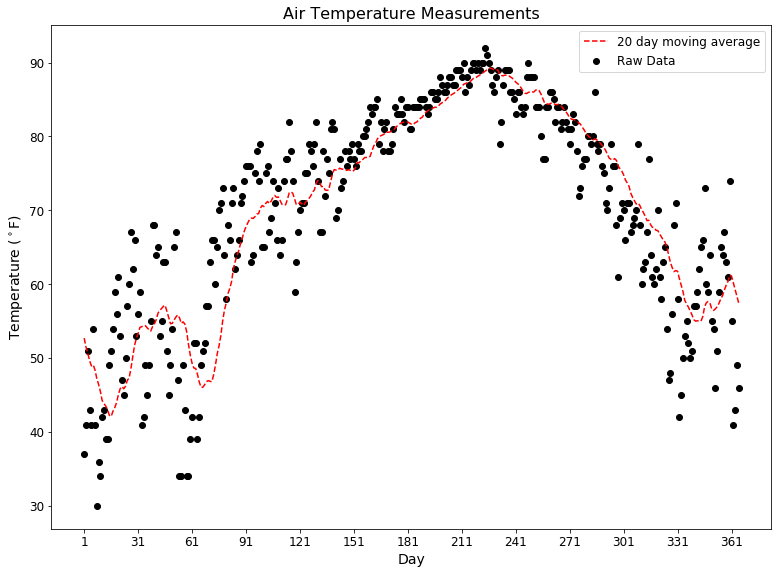

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
#
# Moving averages
#
ax.plot(df_one_year.Day_of_Year,
        df_one_year['20_d_mov_avg'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
#
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)

In [8]:
#
# use the month as a dummy variable
#
dummy_vars = pd.get_dummies(df_one_year['Month'])
dummy_vars.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_one_year = pd.concat([df_one_year, dummy_vars], 
                        axis = 1).drop('Month', axis = 1)
df_one_year

,index,Date,TempAvgF,Year,Day,20_d_mov_avg,Day_of_Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,376,2015-01-01,37,2015,1,52.70,1,1,0,0,0,0,0,0,0,0,0,0,0
1,377,2015-01-02,41,2015,2,51.50,2,1,0,0,0,0,0,0,0,0,0,0,0
2,378,2015-01-03,51,2015,3,50.65,3,1,0,0,0,0,0,0,0,0,0,0,0
3,379,2015-01-04,43,2015,4,49.65,4,1,0,0,0,0,0,0,0,0,0,0,0
4,380,2015-01-05,41,2015,5,48.95,5,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,27,61.10,361,0,0,0,0,0,0,0,0,0,0,0,1
361,737,2015-12-28,41,2015,28,60.20,362,0,0,0,0,0,0,0,0,0,0,0,1
362,738,2015-12-29,43,2015,29,59.25,363,0,0,0,0,0,0,0,0,0,0,0,1
363,739,2015-12-30,49,2015,30,58.45,364,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
#
# fit model using the month dummy vars
#
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(
    pd.concat([df_one_year.Day_of_Year,
               df_one_year.loc[:, 'Jan':'Dec']], axis = 1),
    df_one_year['TempAvgF'])
print('model coefficients: ', linear_model.coef_)
print('model intercept: ', linear_model.intercept_)
print('model r squared: ',
      linear_model.score(
          pd.concat([df_one_year.Day_of_Year,
                     df_one_year.loc[:, 'Jan':'Dec']], axis = 1),
          df_one_year['TempAvgF']))

model coefficients:  [  0.03719346 -14.89319533 -13.31874328  -5.53922212   4.27583985
   7.12746096  11.90703906  15.278015    15.93146949  10.71857447
   0.82395902 -13.35022632 -18.96097081]
model intercept:  63.23358390879811
model r squared:  0.7834805472165678


In [10]:
#
# make predictions using the data
#
y_pred = linear_model.predict(
    pd.concat([df_one_year.Day_of_Year,
               df_one_year.loc[:, 'Jan':'Dec']],
              axis = 1))
x_pred = df_one_year.Day_of_Year

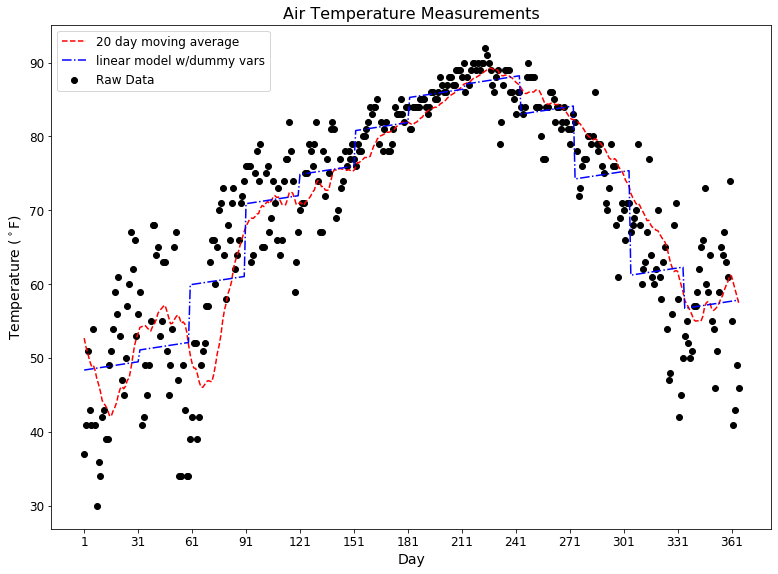

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
#
# Moving averages
#
ax.plot(df_one_year.Day_of_Year,
        df_one_year['20_d_mov_avg'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
#
# regression predictions
#
ax.plot(x_pred, y_pred,
        c = "blue",
        linestyle = '-.',
        label = 'linear model w/dummy vars')
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12,
          loc = 'upper left')